In [17]:
import json, os, cv2
import matplotlib.pyplot as plt
import numpy as np

annotations = None
annotations_path = "./output/train/train_annotations.json"

with open(annotations_path) as f:
    annotations = json.load(f)

In [18]:
def search(list, **kwargs):
    out = []
    for element in list:
        for kw, value in kwargs.items():
            if element[kw] != value:
                continue

            out.append(element)

    return out

In [95]:
import colorsys

def visualize_bounding_boxes(img_id, dataset_dir="./output"):
    img_anns = search(annotations["annotations"], image_id=img_id)
    img_info = search(annotations["images"], id=img_id)[0]

    path = os.path.join(f"{dataset_dir}/train/images/", img_info["file_name"])
    img = cv2.imread(path)

    for ann in img_anns:
        bbox = ann["bbox"]
        print(f'{annotations["categories"][ann["category_id"]]} : {bbox}')
        img = cv2.rectangle(
            img,
            (bbox[0], bbox[1]),
            (bbox[0] + bbox[2], bbox[1] + bbox[3]),
            color=(255, 30, 30),
            thickness=2
        )

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

def hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

def replace_color(img, old_color, new_color):
    mask = cv2.inRange(img, np.array(old_color), np.array(old_color))
    img[mask > 0] = new_color
    return img

def generate_colors(number):
    colors = []
    if number <= 12:
        increment = 1 / number
        counter = 0
        for i in range(number):
            colors.append(hsv2rgb(min(counter, 1), 0.8, 0.4))
            counter += increment
        return colors
    
    elif number <= 36:
        sat_increment = 1 / (number / 3)
        sat_counter = 0.55
        col_counter = 0
        while True:
            for i in range(12):
                hue = i / 12
                if col_counter == number:
                    return colors
                else:
                    colors.append(hsv2rgb(hue, min(sat_counter, 1), 0.5))
                    col_counter += 1

            sat_counter += sat_increment
    
    else:
        raise Exception("Too many colors for this color generator, max is 36")



def visualize_segmentation(img_id, dataset_dir="./output"):
    img_anns = search(annotations["annotations"], image_id=img_id)
    img_info = search(annotations["images"], id=img_id)[0]

    path = os.path.join(f"{dataset_dir}/train/segmentation/", img_info["file_name"])
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    unique_instances = np.unique(img)[1:] #the 1: is to remove background
    colors = generate_colors(len(unique_instances))
    for index, inst in enumerate(unique_instances):
        img = replace_color(img, [inst, inst, inst], colors[index])

    plt.imshow(img)


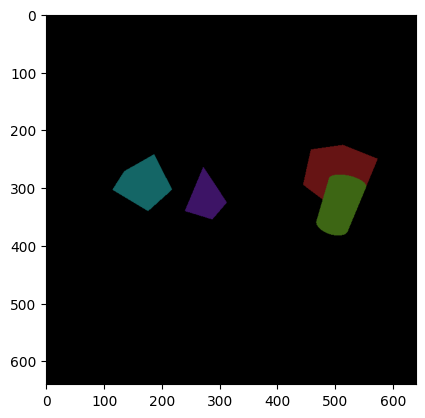

In [99]:
visualize_segmentation(4)

yellow pyramid : [392, 209, 95, 116]
orange pyramid : [185, 412, 70, 78]
white cylinder : [326, 280, 124, 108]
white cube : [127, 195, 80, 107]


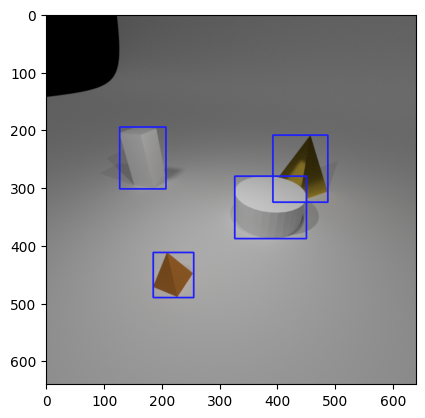

In [20]:
visualize_bounding_boxes(0)